# Exoplanets HW2
## Miles Currie and 

In [1]:
using Pkg
Pkg.add("PyPlot")
using DelimitedFiles
using PyPlot;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %14.4 %>                            ]  28.8 % [==================>                      ]  43.3 %]  57.6 %4 %>          ]  74.9 %====================================>    ]  89.3 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [175]:
function load_data(fl_path)
    data = readdlm(fl_path)
    return data
end;

In [176]:
# load data
data_fl = "./mystery_planet02.txt"
data = load_data(data_fl)

# unpack data
time, flux, flux_err = data[:, 1], data[:, 2], data[:, 3];

# Overlap Area of Two Circles

![Image](./overlap.pdf)

### $ A_{\mathrm{overlap}} = A_{\mathrm{occultor}} + A_{\mathrm{emitter}} - A_{\mathrm{kite}} $

### $ A_{\mathrm{occultor}} = R_{\mathrm{occultor}} \kappa_0 =  R_{\mathrm{occultor}}^2 \arccos{\frac{b^2 + R_{\mathrm{occultor}}^2 - R_{\mathrm{emitter}}^2}{2 b R_{\mathrm{occultor}}}}  $


### $ A_{\mathrm{emitter}} = R_{\mathrm{emitter}} \kappa_1 = R_{\mathrm{emitter}}^2 \arccos{\frac{b^2 + R_{\mathrm{emitter}}^2 - R_{\mathrm{occultor}}^2}{2 b R_{\mathrm{emitter}}}}  $

### $ A_{\mathrm{kite}} = \frac{1}{2} \sqrt{(-b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} - R_{\mathrm{emitter}}) (b - R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) } $


### $ A_{\mathrm{overlap}} = R_{\mathrm{occultor}}^2 \arccos{\frac{b^2 + R_{\mathrm{occultor}}^2 - R_{\mathrm{emitter}}^2}{2 b R_{\mathrm{occultor}}}} + R_{\mathrm{emitter}}^2 \arccos{\frac{b^2 + R_{\mathrm{emitter}}^2 - R_{\mathrm{occultor}}^2}{2 b R_{\mathrm{emitter}}}} - \frac{1}{2} \sqrt{(-b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} - R_{\mathrm{emitter}}) (b - R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) } $

In [29]:
function overlap_area_myattempt(separation, r_occultor, r_emitter)
    
    area = (r_occultor^2 * acos((separation^2 + r_occultor^2 - r_emitter^2) / (2*separation*r_occultor))
        + r_emitter^2 * acos((separation^2 + r_emitter^2 - r_occultor^2) / (2*separation*r_emitter))
        - 0.5 * sqrt((-separation + r_occultor + r_emitter) * (separation + r_occultor - r_emitter)
            * (separation - r_occultor + r_emitter) * (separation + r_occultor + r_emitter)))
    return area
end


overlap_area_myattempt (generic function with 1 method)

In [96]:
function overlap_area(x, r_p, d)
    # using bat-formalism 
    # x = stellar radius
    # r_p = planet radius
    # d = separation of star and planet centers
        
    # We only care about absolute distance between star and planet (sign doesn't matter)
    d = abs(d)
    
    u = (d^2 + x^2 - r_p^2) / (2*d*x)
    v = (d^2 + r_p^2 - x^2) / (2*d*r_p)
    w = (-d + x + r_p) * (d + x - r_p) * (d - x + r_p) * (d + x + r_p)
    
    if d >= r_p + x
        area = 0
    elseif r_p - d < x < r_p + d
#         print(d, " ", acos(u), " ", acos(v), "\n")
        area = x^2*acos(u) + r_p^2*acos(v) - 0.5*sqrt(w)
    elseif x <= r_p - d
        area = pi * x^2
    elseif x >= r_p + d
        area = pi * r_p^2
    
    end
    
    return area
end

overlap_area (generic function with 1 method)

02

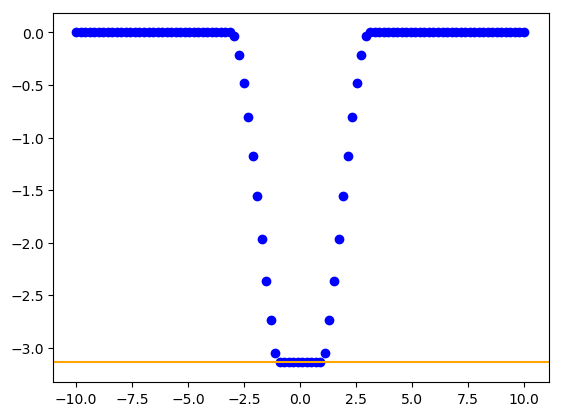

.9292929292929295 0.15274125691913099 0.3091993851155458
2.727272727272727 0.2949448271248536 0.6204165366307005
2.525252525252525 0.3809465325813822 0.838436495214816
2.323232323232323 0.44261633451235505 1.028663706899048
2.121212121212121 0.48671423518198603 1.2095256152292326
1.9191919191919191 0.5144012866625349 1.3918254197142055
1.7171717171717171 0.5235343092174397 1.5857404362032406
1.5151515151515151 0.5078586201316988 1.805365771170866
1.3131313131313131 0.4523174499615608 2.0780082063057965
1.1111111111111112 0.30854053532768816 2.488888617810791
1.1111111111111112 0.30854053532768816 2.488888617810791
1.3131313131313131 0.4523174499615608 2.0780082063057965
1.5151515151515151 0.5078586201316988 1.805365771170866
1.7171717171717171 0.5235343092174397 1.5857404362032406
1.9191919191919191 0.5144012866625349 1.3918254197142055
2.121212121212121 0.48671423518198603 1.2095256152292326
2.323232323232323 0.44261633451235505 1.028663706899048
2.525252525252525 0.3809465325813822 0

In [86]:
distances = range(-10, stop=10, length=100)
stellar_radius = 2
planet_radius = 1

print(overlap_area(2, 1, 100))
for (t, d) in enumerate(distances)
    area = overlap_area(stellar_radius, planet_radius, d)
    scatter(d, -area, c=:blue)
end
axhline(-pi, color="orange")
show()




# Layer-Cake a la Batman

100-element Array{Float64,1}:
 0.0                 
 0.010101010101010102
 0.020202020202020204
 0.030303030303030304
 0.04040404040404041 
 0.050505050505050504
 0.06060606060606061 
 0.0707070707070707  
 0.08080808080808081 
 0.09090909090909091 
 0.10101010101010101 
 0.1111111111111111  
 0.12121212121212122 
 ⋮                   
 0.8888888888888888  
 0.898989898989899   
 0.9090909090909091  
 0.9191919191919192  
 0.9292929292929293  
 0.9393939393939394  
 0.9494949494949495  
 0.9595959595959596  
 0.9696969696969697  
 0.9797979797979798  
 0.98989898989899    
 1.0                 

In [ ]:
function frac_stellar_flux_blocked()
    
end


$$
\delta(d; r_p) = \sum_{i = 1}^n \Delta \delta_i(d; r_p)
$$
$$
\Delta \delta_i(d; r_p) = I \left( \frac{x_i + x_{i - 1}}{2} \right) \left[A(x_i, r_p, d) - A(x_{i - 1}, r_p, d)  \right]
$$

In [119]:
# Compute the quantity Delta delta
# I is the intensity profile
# A is the area of overlap function
# r_p is the radius of the planet
# d is the distance
function d_delta(i, x, d, r_p, I)
    avg_x = (x[i] + x[i - 1]) / 2
    delta_A = overlap_area(x[i], r_p, d) - overlap_area(x[i - 1], r_p, d)
    return I(avg_x) * delta_A
end

d_delta (generic function with 2 methods)

## Intensity profile as a function of normalized stellar radius $x \in [0, 1] $

In [142]:
function I_const(x)
   return  1
end

I_const (generic function with 1 method)

In [130]:
function I_linear(x)
    mu = sqrt(1 - x^2)
    I_0 = 1
    c_1 = 1
    return I_0 * (1 - c_1*(1 - mu))
end;

In [163]:
function I_quadratic(x)
    I_0 = 1
    c_1 = 0.5
    c_2 = 0.5
    mu = sqrt(1 - x^2)
    return I_0 * (1 - c_1*(1 - mu) - c_2 * (1 - mu)^2)
end;

## Computation of delta at single d

In [268]:
function compute_delta(d, I)
    num_steps = 100
    x = collect(range(0, stop=1, length=num_steps))
    delta = 0
    planet_radius = 0.5
    for i in range(2, stop=num_steps)
        delta += d_delta(i, x, d, planet_radius, I)
    end
    return delta
end;

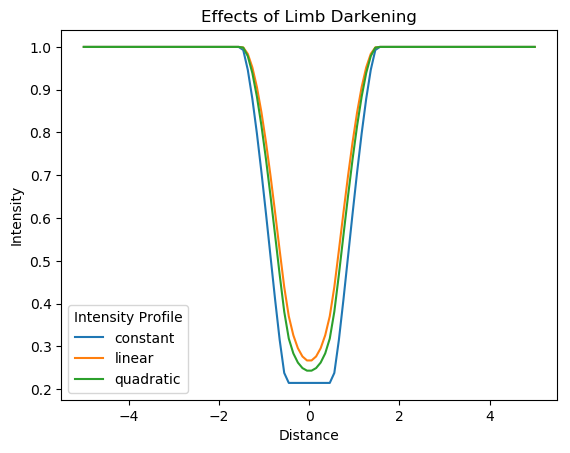

In [270]:
d_grid = collect(range(-5, stop=5, length=100))
deltas_const = []
deltas_linear = []
deltas_quatratic = []

for d in d_grid
    append!(deltas_const, compute_delta(d, I_const))
    append!(deltas_linear, compute_delta(d, I_linear))
    append!(deltas_quatratic, compute_delta(d, I_quadratic)) 
end

figure()
title("Effects of Limb Darkening")
plot(d_grid, 1 .- deltas_const, label="constant")
plot(d_grid, 1 .- deltas_linear, label="linear")
plot(d_grid, 1 .- deltas_quatratic, label="quadratic")
legend(title="Intensity Profile")
xlabel("Distance")
ylabel("Intensity")
show()


# Period finding and transit fitting

Use **model** to fit the data. What is the 
- **Period**: Periodogram (not working)
- **depth**: Fitting transit curve to **folded** data
- **impact parameter**: 
- **duration**

$$ 
T_{I, IV} = \frac{2 \sqrt{(R_{*} + R_P)^2 - (b R_{*})^2}}{v} \approx 2 \sqrt{ 1 - b^2} \frac{R_{*}}{v} ~~(R_P << R_{*})
$$

for $e = 0$

$$
T \approx \frac{\sqrt{1 - b^2} R_{*} P}{\pi a}
$$

$$
T \approx ( \frac{3}{\pi^2} )^{1/3} \sqrt{1 - b^2} P^{1/3} ( G \rho_{*} )^{-1/3}
$$

of the transit. 

What is the **density** of the star.

$$
\rho_{*} = \frac{3}{\pi^2} \frac{P}{G T^3} (1 - b^2)^{3/2}
$$

# Periodogram

In [172]:
print(size(flux))
figure()
scatter(time, flux)
show();

UndefVarError: UndefVarError: flux not defined

In [166]:
function get_phase(time, P)
    phase = (time ./ P) .% 1
    return phase
end;

In [169]:
function compute_scatter(y)
    N = size(y)[1]
    scatter = 0
    for i in range(1, stop=N - 1)
        scatter = scatter + (y[i] - y[i + 1])^2
    end
    return scatter
end;

In [180]:
function periodogram(y, t, P_vals)
    scatters_list = []
    for period in P_vals
        phase = get_phase(t, period)
        phase_sorted_inds = sortperm(phase)
        y_phase_sorted = y[phase_sorted_inds]
        scatter = compute_scatter(y_phase_sorted)
        append!(scatters_list, scatter)
    end
    return scatters_list
end;

In [230]:
function smooth(y)
    smoothed_ys = []
    for (i, y_i) in enumerate(y)
        if i == 1
           append!(smoothed_ys, (y[i] + y[i + 1]) / 2)
        elseif i == size(y)[1]
           append!(smoothed_ys, (y[i] + y[i - 1]) / 2)
        else
            append!(smoothed_ys, (y[i + 1] + y[i] + y[i - 1]) / 3) 
        end
    end
    return smoothed_ys
end;

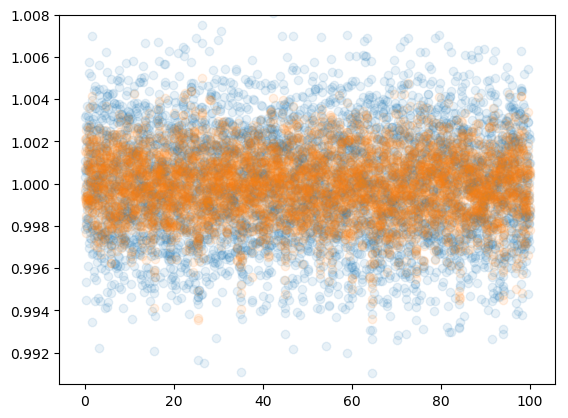

(0.9905, 1.008)

In [265]:
scatter(time, flux, alpha=0.1)
scatter(time, smooth(flux), alpha=0.1)
# xlim([15, 16])
ylim([0.9905, 1.008])

In [ ]:
scatter()

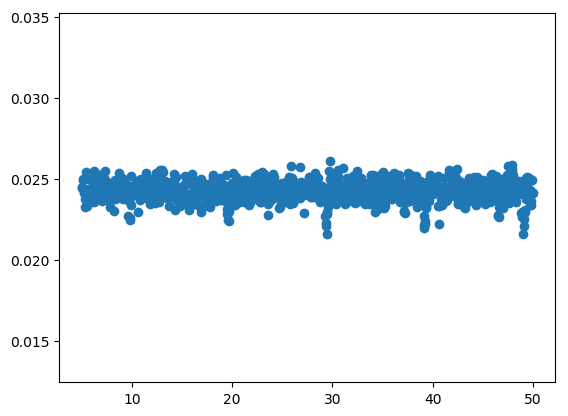

PyObject <matplotlib.collections.PathCollection object at 0x139f82940>

In [232]:
Ps = collect(range(5, stop=50, length=1000))
scatters = periodogram(smooth(flux), time, Ps)
scatter(Ps, scatters)

In [233]:
Ps[argmin(scatters)]

29.414414414414413

In [239]:
function plot_folded_data(time, y, period)
    figure();
    phase = get_phase(time, period)
    scatter(phase, y)
#     errorbar(phase, rv_data, yerr=rv_err, fmt="o", markersize=1, ecolor="k", elinewidth=1, capsize=2, barsabove=true)#, markersize=0, ecolor="k")
    xlabel("Phase")
#     ylabel("")
end;


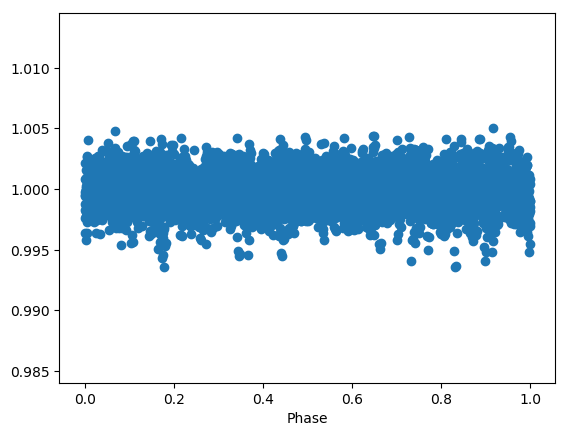

PyObject Text(0.5, 24.0, 'Phase')

In [242]:
plot_folded_data(time, smooth(flux), 9)